# Đề bài về nhà

## Yêu cầu

- Tự viết code cho mô hình Linear Regression theo công thức đã được dạy trong buổi lý thuyết trên lớp.
- Tự viết hàm dự đoán.
- Huấn luyện cả mô hình của thư viện và mô hình mình tự viết.
- In ra các trọng số: w0, w1, w2, ..., wn của cả 2 mô hình đã huấn luyện để quan sát và so sánh.
- Dự đoán dữ liệu tập test bằng cả 2 mô hình (mô hình thư viện thì dùng hàm predict() của thư viện, mô hình tự viết dùng hàm dự đoán tự viết), in ra kết quả bằng Dataframe như trong bài thực hành trên lớp.
- Tính RMSE trên tập test cho cả 2 mô hình và so sánh.

## Dữ liệu

Tập dữ liệu giá nhà ở Boston đã có sẵn trên sklearn, dữ liệu đã được chuẩn hóa và chia thành tập train, tập test

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score #r2_score -> fomular: 1 - sum((y - y_pred)^2)/sum((y - y_avg)^2)

from SGD_StochasticGD import X_train

# Đọc dữ liệu

Dữ liệu về giá nhà ở Boston được hỗ trợ bởi sklearn, đọc dữ liệu thông qua hàm `datasets.load_boston()`

Xem thêm các bộ dữ liệu khác tại https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

Dữ liệu được chia thành các thành phần data và target như tập diabetes. Dữ liệu cũng đã được chuẩn hóa, chỉ cần gọi ra và huấn luyện

In [48]:
# lay du lieu dataset - du lieu ve giá nhà
# dataset = datasets.load_boston() #this dataset has been deleted by sklearn

# replace by suggested code recommended by sklearn
from sklearn.datasets import fetch_openml

# Load Boston Housing dataset từ OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)

data = boston.data.to_numpy(dtype=float)       # dữ liệu input
target = boston.target.to_numpy(dtype=float)   # giá nhà (target)

print("Số chiều dữ liệu input: ", data.shape)
print("Số chiều dữ liệu target: ", target.shape)
print()

print("5 mẫu dữ liệu đầu tiên:")
np.set_printoptions(suppress=True, precision=2, linewidth=np.inf)
print("input:\n", data[:5])
print("target: ",target[:5])

Số chiều dữ liệu input:  (506, 13)
Số chiều dữ liệu target:  (506,)

5 mẫu dữ liệu đầu tiên:
input:
 [[  0.01  18.     2.31   0.     0.54   6.58  65.2    4.09   1.   296.    15.3  396.9    4.98]
 [  0.03   0.     7.07   0.     0.47   6.42  78.9    4.97   2.   242.    17.8  396.9    9.14]
 [  0.03   0.     7.07   0.     0.47   7.18  61.1    4.97   2.   242.    17.8  392.83   4.03]
 [  0.03   0.     2.18   0.     0.46   7.    45.8    6.06   3.   222.    18.7  394.63   2.94]
 [  0.07   0.     2.18   0.     0.46   7.15  54.2    6.06   3.   222.    18.7  396.9    5.33]]
target:  [24.  21.6 34.7 33.4 36.2]


**Chia dữ liệu làm 2 phần training 362 mẫu và testing 80 mẫu**

In [33]:
# cat nho du lieu, lay 1 phan cho qua trinh thu nghiem,
# chia train test cac mau du lieu
# dataset_X = dataset.data[:, np.newaxis, 2]
dataset_X = data

dataset_X_train = dataset_X[:404]
dataset_y_train = target[:404]

dataset_X_test = dataset_X[405:]
dataset_y_test = target[405:]

# Xây dựng mô hình

## Xây dựng mô hình bằng thư viện

In [34]:
from sklearn import linear_model

skRegr = linear_model.LinearRegression()


## Xây dựng mô hình Linear Regression tự viết

In [35]:
#gradient of cost function
def grad(X, y, w, b):
  N = X.shape[0]
  error = X @ w + b - y
  gw = X.T @ (error)
  gb = np.sum(error)
  return gw / N, gb / N

#cost function
def cost(X, y, w, b):
  N = X.shape[0]
  c = np.linalg.norm(X @ w + b - y)
  return c ** 2 /  (2 * N)



In [36]:
print(dataset_X_train[0:1].T.shape)

def myRegr(X, y):
  alpha = 1e-6
  w_init = np.zeros_like(X[0:1].T)
  b_init = 0
  w_history = [w_init]
  b_history = [b_init]

  loop_iter = 1000
  for i in range(loop_iter):
    gw, gb = grad(X, y, w_history[-1], b_history[-1])
    w_new = w_history[-1] - alpha * gw
    b_new = b_history[-1] - alpha * gb

    w_history.append(w_new)
    b_history.append(b_new)



  return w_history, b_history

(13, 1)


## Hàm test mô hình tự viết

In [37]:
def myRegr_predict(w, b, X_test):
  return X_test @ w + b

# Huấn luyện mô hình

## Huấn luyện mô hình của thư viện

In [49]:
skRegr.fit(dataset_X_train, dataset_y_train)

print('cost J = ', cost(dataset_X_train, dataset_y_train.reshape(-1, 1), skRegr.coef_.reshape(-1, 1), skRegr.intercept_))
print("[w_1, ... w_n] = ", skRegr.coef_)
print("w_0 = ", skRegr.intercept_)
print(f'shape of w = {skRegr.coef_.shape}')

cost J =  11.389189760900393
[w_1, ... w_n] =  [ -0.2    0.04   0.05   1.88 -14.93   4.76   0.    -1.3    0.46  -0.02  -0.81  -0.    -0.53]
w_0 =  30.077166922901817
shape of w = (13,)


## Training mô hình bằng Linear regression tự viết

In [50]:
w_history, b_history = myRegr(dataset_X_train, dataset_y_train.reshape(-1, 1))

print('cost J = ', cost(dataset_X_train, dataset_y_train.reshape(-1, 1), w_history[-1], b_history[-1]))
print("[w_1, ... w_n] = ", w_history[-1].T)
print("w_0 = ", b_history[-1])
print(f'shape of w = {w_history[-1].shape}')

cost J =  37.54134033308976
[w_1, ... w_n] =  [[-0.01  0.04 -0.01  0.    0.    0.01 -0.    0.   -0.   -0.01 -0.    0.07 -0.03]]
w_0 =  0.0004007717609094253
shape of w = (13, 1)


# Dự đoán các mẫu dữ liệu

## Dự đoán các mẫu dữ liệu theo mô hình của thư viện

In [40]:
#Test sklearn model
y_Sklearn_pred = skRegr.predict(dataset_X_test)

print(y_Sklearn_pred[:5])


[ 3.78705697  6.64054968 21.31276497 15.41271412 23.65229756]


## Dự đoán các mẫu dữ liệu tính theo linear regression tự viết

In [41]:
y_my_pred = myRegr_predict(w_history[-1], b_history[-1], dataset_X_test)

print(y_my_pred[:5].T)

[[18.65520383 17.98712622 15.57722332 13.89686079  3.94306354]]


## Đánh giá mô hình linear regression của thư viện

RMSE = 5.75
R2 = 24.33 %


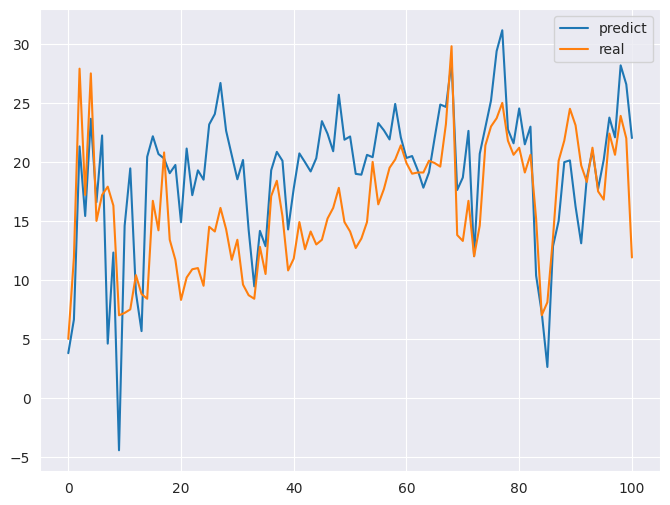

In [42]:
print(f'RMSE = {np.sqrt(mean_squared_error(y_pred=y_Sklearn_pred, y_true = dataset_y_test)) :.2f}')
print(f'R2 = {np.abs(r2_score(y_pred=y_Sklearn_pred, y_true=dataset_y_test)) * 100 :.2f} %')

plt.figure(figsize = (8, 6))
plt.plot(y_Sklearn_pred, label = 'predict')
plt.plot(dataset_y_test, label = 'real')
plt.legend()
plt.show()

## Đánh giá mô hình linear regression tự viết

RMSE = 11.51
R2 = 397.92 %


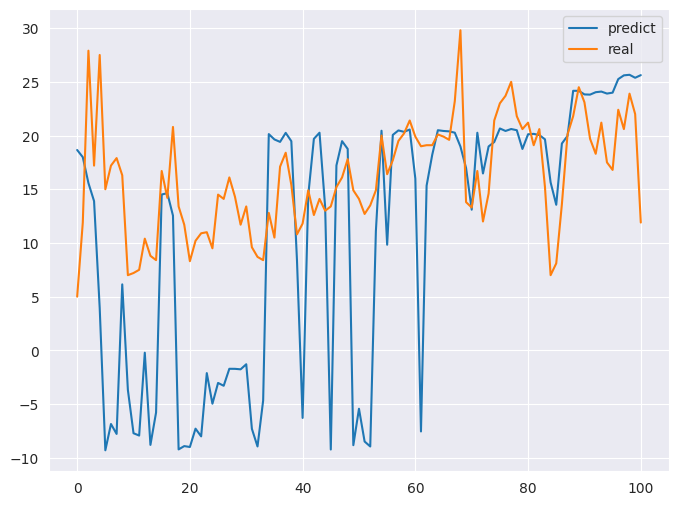

In [43]:
print(f'RMSE = {np.sqrt(mean_squared_error(y_pred=y_my_pred, y_true = dataset_y_test)) :.2f}')
print(f'R2 = {np.abs(r2_score(y_pred=y_my_pred, y_true=dataset_y_test)) * 100 :.2f} %')

plt.figure(figsize = (8, 6))
plt.plot(y_my_pred, label = 'predict')
plt.plot(dataset_y_test, label = 'real')
plt.legend()
plt.show()

# Xây dựng trọng số mô hình bằng công thức nghiệm (tại điểm cực tiểu grad = 0)
### Điều kiện cực tiểu
$ \nabla J(w,b) = 0 $ với $ J = \tfrac{1}{2N}\,\|Xw + b - y\|^{2} $

### Ý tưởng đơn giản hoá
- Xem bias $b$ như một trọng số $w_0$.
- Ghép $b$ vào vector trọng số $w$ bằng cách thêm một cột toàn 1 vào ma trận $X$.
- Khi đó cost function trở thành:
$ J = \tfrac{1}{2N}\,\|Xw - y\|^{2} $

### Nghiệm dạng đóng
Bài toán tối ưu tương đương với việc giải:
$ \nabla J(w) = 0 $

Suy ra nghiệm:
$ w = (X^T X)^{-1} (X^T y) $


In [54]:
#concat a col that all element = 1 to X_train
row_col = (dataset_X_train.shape[0], 1)
col1 = np.ones(row_col)

dataset_X_train_new = np.concatenate((col1, dataset_X_train), axis=1)

print(dataset_X_train_new[:5])

[[  1.     0.01  18.     2.31   0.     0.54   6.58  65.2    4.09   1.   296.    15.3  396.9    4.98]
 [  1.     0.03   0.     7.07   0.     0.47   6.42  78.9    4.97   2.   242.    17.8  396.9    9.14]
 [  1.     0.03   0.     7.07   0.     0.47   7.18  61.1    4.97   2.   242.    17.8  392.83   4.03]
 [  1.     0.03   0.     2.18   0.     0.46   7.    45.8    6.06   3.   222.    18.7  394.63   2.94]
 [  1.     0.07   0.     2.18   0.     0.46   7.15  54.2    6.06   3.   222.    18.7  396.9    5.33]]


In [58]:
first = np.linalg.pinv(dataset_X_train_new.T @ dataset_X_train_new)
second = dataset_X_train_new.T @ dataset_y_train

w = first @ second

print(f"w_0 = {w[0]}")
print(f"w = [w1...w_n] = {w[1:]}")

print("Compare with Sklearn")
print(skRegr.intercept_)
print(skRegr.coef_)

w_0 = 30.07716692083841
w = [w1...w_n] = [ -0.2    0.04   0.05   1.88 -14.93   4.76   0.    -1.3    0.46  -0.02  -0.81  -0.    -0.53]
Compare with Sklearn
30.077166922901817
[ -0.2    0.04   0.05   1.88 -14.93   4.76   0.    -1.3    0.46  -0.02  -0.81  -0.    -0.53]
